In [4]:

!pip install gcastle
!pip install causal-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.9/214.9 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.4/174.4 kB 4.4 MB/s eta 0:00:00


###Please complete the cell below before uploading files

In [2]:
from google.colab import files

### Instructions for uploading files to a temporary colab folder


Click on this icon on the left

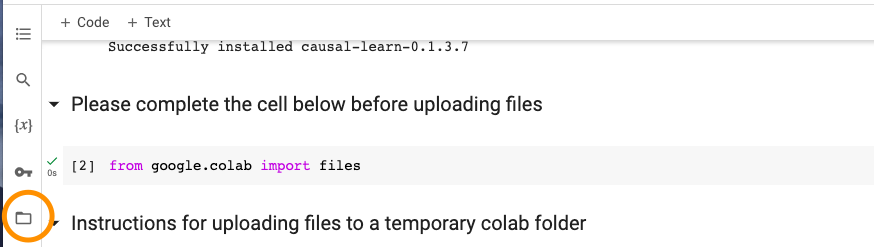

Click on this icon to upload files to a temporary colab folder



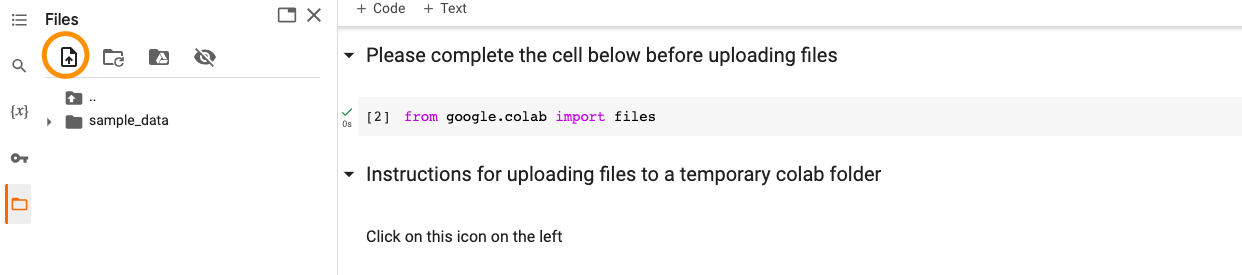

Check if all files have been downloaded

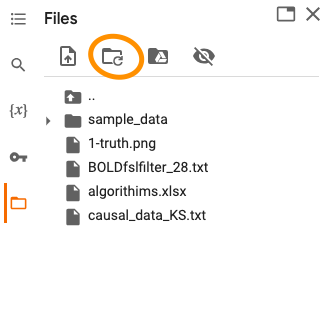

### Code

In [5]:
import os, time
import sys

sys.path.append("/content/")
import unittest
import hashlib
import numpy as np
from causallearn.search.ConstraintBased.PC import pc
from causallearn.search.ScoreBased.GES import ges
from causallearn.utils.cit import chisq, fisherz, gsq, kci, mv_fisherz, d_separation
from causallearn.graph.SHD import SHD
from causallearn.utils.DAG2CPDAG import dag2cpdag
from causallearn.utils.TXT2GeneralGraph import txt2generalgraph
#from .utils_simulate_data import simulate_discrete_data, simulate_linear_continuous_data

from causallearn.utils.GraphUtils import GraphUtils
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import io

from castle.common import GraphDAG
from castle.metrics import MetricsDAG
from castle.datasets import IIDSimulation, DAG
from castle.algorithms import PC
from castle.algorithms.ges.ges import GES
from castle.algorithms import ICALiNGAM, DirectLiNGAM

matrix = np.matrix([[0, 1, 0, 0, 1],
        [1, 0, 1, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0]])

In [6]:
import numpy as np
import pandas as pd

# Number of samples
n_samples = 2000

# Adjacency matrix for the DAG
adj_matrix = np.array([[0, 1, 0, 0, 1],
                       [1, 0, 1, 0, 0],
                       [0, 0, 0, 1, 0],
                       [0, 0, 0, 0, 1],
                       [0, 0, 0, 0, 0]])

# Initialize the dataset with zeros
data = np.zeros((n_samples, adj_matrix.shape[0]))

# Coefficients for the linear relationships, 0-based indexing
coefficients = {0: 1.1, 1: 3.5, 2: -0.2, 3: 0.7}

# Generate data according to the DAG
# Note: The loop now properly starts from 0 for 0-based indexing
for i in range(adj_matrix.shape[0]):
    for j in range(adj_matrix.shape[1]):
        if adj_matrix[j, i] == 1:  # Switched i and j for correct referencing
            # Add the influence of the j-th variable on the i-th variable
            data[:, i] += coefficients[j] * data[:, j]

# Add normally distributed noise to each variable
noise_strength = 0.3
for i in range(adj_matrix.shape[0]):
    data[:, i] += np.random.normal(scale=noise_strength, size=n_samples)

# Convert to DataFrame for usability
variable_names = ['X1', 'X2', 'X3', 'X4', 'X5']
df = pd.DataFrame(data, columns=variable_names)

# Show the first few rows of the generated dataset
print(df.head())

         X1        X2        X3        X4        X5
0  0.255120  0.259762 -0.024919  0.111765  0.058935
1  0.035327  0.048088 -0.170222  0.637141 -0.219212
2 -0.011892  0.166598  0.508497 -0.008754  0.112858
3 -0.090457 -0.128288  0.027456 -0.119386 -0.366358
4  0.034200  0.056819  0.109301  0.114106  0.301843


In [7]:
df.to_csv('causal_data.txt', sep='\t', index=False)

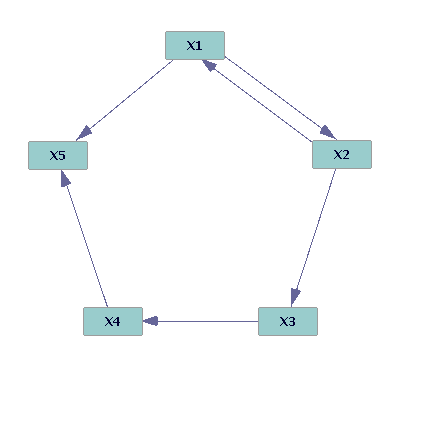

In [8]:
from IPython.display import Image
Image(filename='/content/1-truth.png')

In [9]:
data_path = "/content/BOLDfslfilter_28.txt"
#data_path = "causal_data_KS.txt"
data_full = np.loadtxt(data_path, skiprows=1)
data_half = np.loadtxt(data_path, skiprows=250)

# PC alg causal-learn lib, full data

  0%|          | 0/5 [00:00<?, ?it/s]

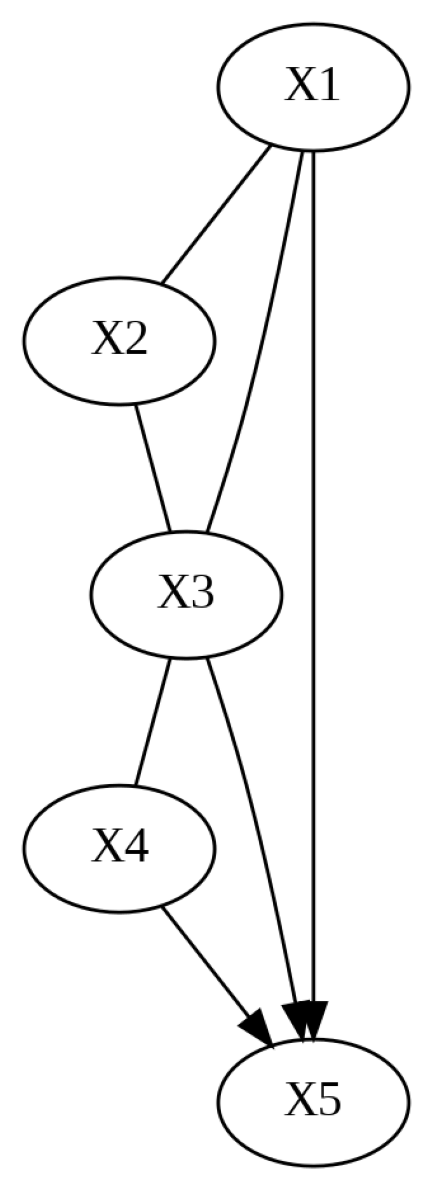

In [10]:
#https://causal-learn.readthedocs.io/en/latest/search_methods_index/Constraint-based%20causal%20discovery%20methods/PC.html

# Run PC with default parameters: stable=True, uc_rule=0 (uc_sepset), uc_priority=2 (prioritize existing colliders)
cg = pc(data_full, 0.05, fisherz)  # Run PC and obtain the estimated graph (cg is CausalGraph object)

# visualization using networkx
#cg.to_nx_graph()
#cg.draw_nx_graph(skel=False)

# visualization using pydot
cg.draw_pydot_graph()

# PC alg causal-learn lib, half data

  0%|          | 0/5 [00:00<?, ?it/s]

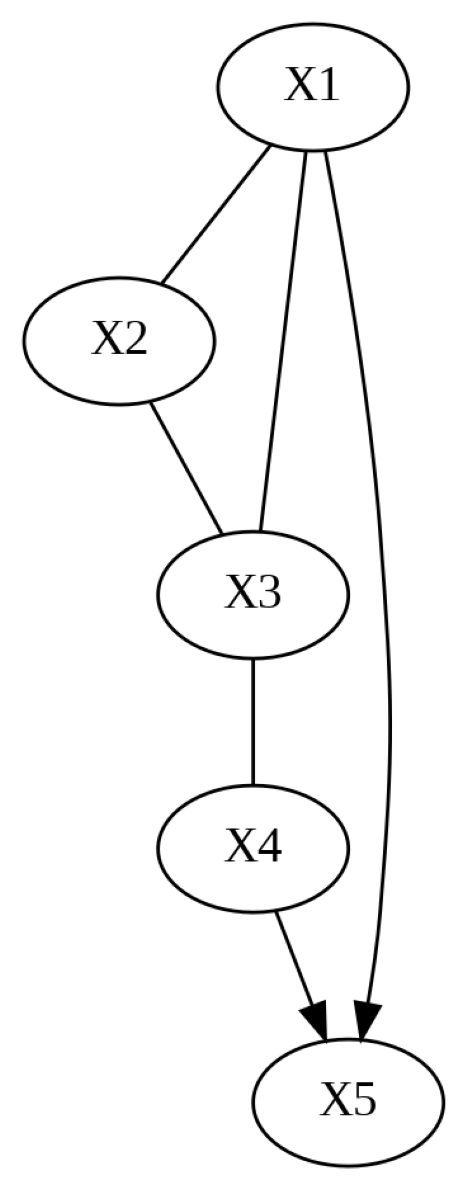

In [11]:
# Run PC with default parameters: stable=True, uc_rule=0 (uc_sepset), uc_priority=2 (prioritize existing colliders)
cg = pc(data_half, 0.05, fisherz)  # Run PC and obtain the estimated graph (cg is CausalGraph object)

# visualization using networkx
#cg.to_nx_graph()
#cg.draw_nx_graph(skel=False)

# visualization using pydot
cg.draw_pydot_graph()

# GES alg causal-learn lib, full data

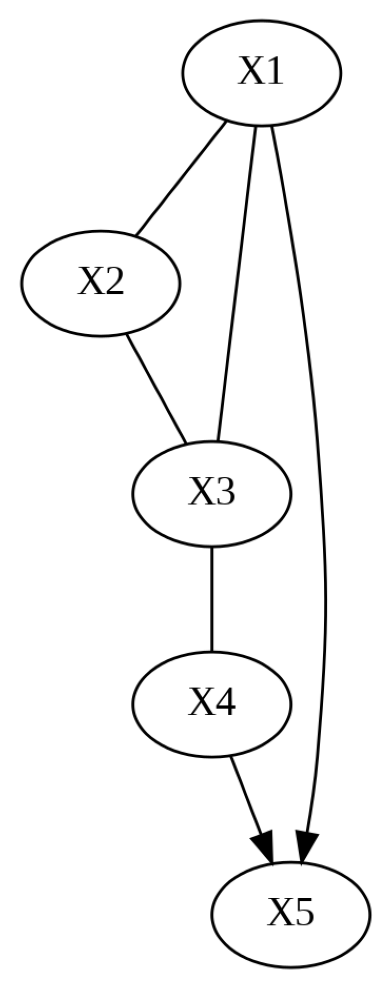

In [12]:
#https://causal-learn.readthedocs.io/en/latest/search_methods_index/Score-based%20causal%20discovery%20methods/GES.html

# Run GES with default parameters: score_func='local_score_BIC', maxP=None, parameters=None
res_map = ges(data_full, score_func='local_score_BIC', maxP=None, parameters=None)  # Run GES and obtain the estimated graph (res_map is Dict object，which contains the updated steps, the result causal graph and the result score.)

# Visualization using pydot
pyd = GraphUtils.to_pydot(res_map['G'])
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.figure(figsize=(5,10))
plt.axis('off')
plt.imshow(img)
plt.show()

# GES alg causal-learn lib, half data

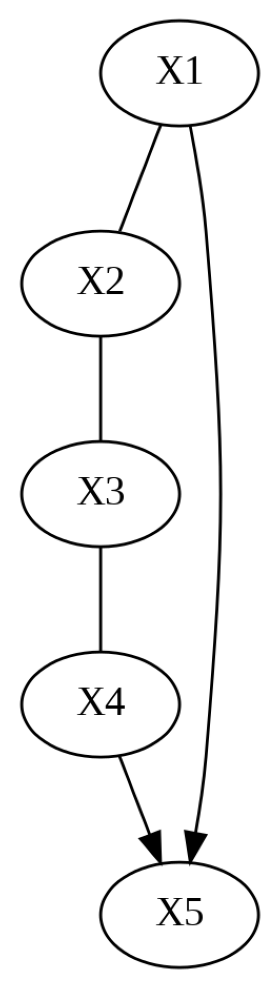

In [13]:
#https://causal-learn.readthedocs.io/en/latest/search_methods_index/Score-based%20causal%20discovery%20methods/GES.html

# Run GES with default parameters: score_func='local_score_BIC', maxP=None, parameters=None
res_map = ges(data_half, score_func='local_score_BIC', maxP=None, parameters=None)  # Run GES and obtain the estimated graph (res_map is Dict object，which contains the updated steps, the result causal graph and the result score.)

# Visualization using pydot
pyd = GraphUtils.to_pydot(res_map['G'])
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.figure(figsize=(5,10))
plt.axis('off')
plt.imshow(img)
plt.show()

# LiNGAM alg causal-learn lib, full data

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


[1, 2, 3, 4, 0]
[[0.    0.767 0.193 0.    0.165]
 [0.    0.    0.    0.    0.   ]
 [0.    0.537 0.    0.    0.   ]
 [0.    0.    0.368 0.    0.   ]
 [0.    0.202 0.149 0.232 0.   ]]


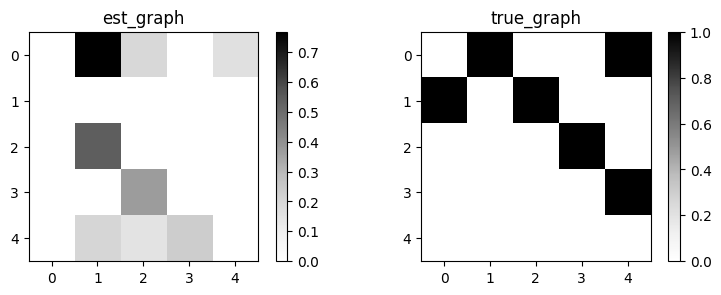

{'fdr': 0.5, 'tpr': 0.5, 'fpr': 0.25, 'shd': 4, 'nnz': 2, 'precision': 0.5, 'recall': 0.1667, 'F1': 0.25, 'gscore': 0.0}


In [14]:
#https://causal-learn.readthedocs.io/en/latest/search_methods_index/Causal%20discovery%20methods%20based%20on%20constrained%20functional%20causal%20models/lingam.html
from causallearn.search.FCMBased import lingam

model = lingam.ICALiNGAM()
model.fit(data_full)

print(model.causal_order_)
print(model.adjacency_matrix_)

# plot predict_dag and true_dag
GraphDAG(model.adjacency_matrix_, matrix.A, 'result')

mt = MetricsDAG(np.round(model.adjacency_matrix_,0), matrix.A)
print(mt.metrics)

# LiNGAM alg causal-learn lib, half data

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


[2, 4, 1, 0, 3]
[[0.    0.807 0.142 0.    0.208]
 [0.    0.    0.436 0.    0.26 ]
 [0.    0.    0.    0.    0.   ]
 [0.    0.    0.322 0.    0.31 ]
 [0.    0.    0.349 0.    0.   ]]


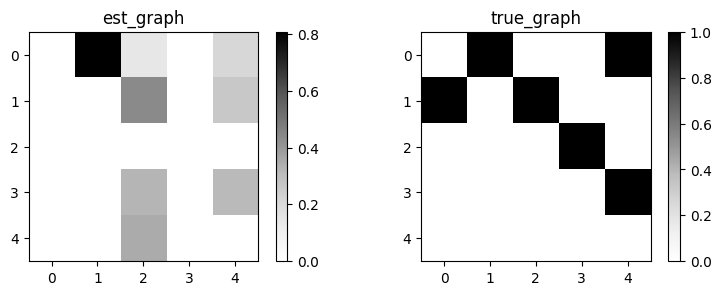

{'fdr': 0.0, 'tpr': 0.5, 'fpr': 0.0, 'shd': 4, 'nnz': 1, 'precision': 1.0, 'recall': 0.1667, 'F1': 0.2857, 'gscore': 0.1667}


In [15]:
#https://causal-learn.readthedocs.io/en/latest/search_methods_index/Causal%20discovery%20methods%20based%20on%20constrained%20functional%20causal%20models/lingam.html
from causallearn.search.FCMBased import lingam

model = lingam.ICALiNGAM()
model.fit(data_half)

print(model.causal_order_)
print(model.adjacency_matrix_)

# plot predict_dag and true_dag
GraphDAG(model.adjacency_matrix_, matrix.A, 'result')

mt = MetricsDAG(np.round(model.adjacency_matrix_,0), matrix.A)
print(mt.metrics)

# PC alg gcastle lib, full data

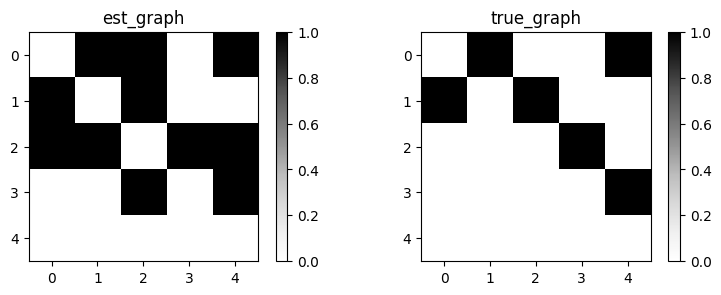

{'fdr': 0.2857, 'tpr': 1.1667, 'fpr': 0.5, 'shd': 2, 'nnz': 7, 'precision': 0.5455, 'recall': 1.0, 'F1': 0.7059, 'gscore': 0.1667}


In [16]:
# structure learning
pc = PC(0.05)
pc.learn(data_full)

# plot predict_dag and true_dag
GraphDAG(pc.causal_matrix, matrix.A, 'result')

# calculate metrics
mt = MetricsDAG(pc.causal_matrix, matrix.A)
print(mt.metrics)

# PC alg gcastle lib, half data

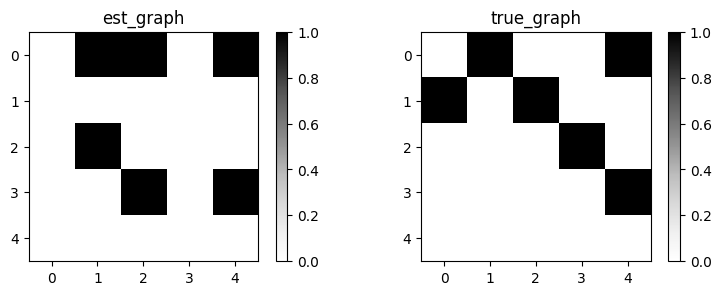

{'fdr': 0.5, 'tpr': 0.8333, 'fpr': 0.75, 'shd': 3, 'nnz': 6, 'precision': 0.5, 'recall': 0.5, 'F1': 0.5, 'gscore': 0.0}


In [17]:
# structure learning
pc = PC(0.05)
pc.learn(data_half)

# plot predict_dag and true_dag
GraphDAG(pc.causal_matrix, matrix.A, 'result')

# calculate metrics
mt = MetricsDAG(pc.causal_matrix, matrix.A)
print(mt.metrics)

# GES alg gcastle lib, full data

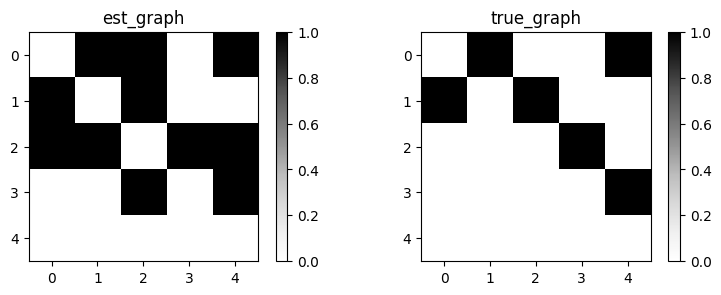

{'fdr': 0.2857, 'tpr': 1.1667, 'fpr': 0.5, 'shd': 2, 'nnz': 7, 'precision': 0.5455, 'recall': 1.0, 'F1': 0.7059, 'gscore': 0.1667}


In [18]:
algo = GES(criterion='bic', method='scatter')
algo.learn(data_full)

# plot predict_dag and true_dag
GraphDAG(algo.causal_matrix, matrix.A)
m1 = MetricsDAG(algo.causal_matrix, matrix.A)
print(m1.metrics)

# PC alg gcastle lib, half data

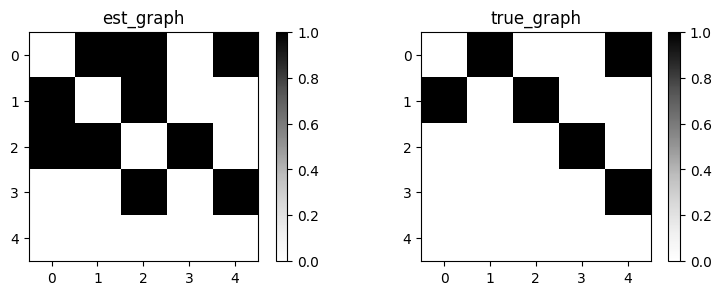

{'fdr': 0.1667, 'tpr': 1.1667, 'fpr': 0.25, 'shd': 1, 'nnz': 6, 'precision': 0.6, 'recall': 1.0, 'F1': 0.75, 'gscore': 0.3333}


In [19]:
algo = GES(criterion='bic', method='scatter')
algo.learn(data_half)

# plot predict_dag and true_dag
GraphDAG(algo.causal_matrix, matrix.A)
m1 = MetricsDAG(algo.causal_matrix, matrix.A)
print(m1.metrics)

# ICALiNGAM alg gcastle lib, full data

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


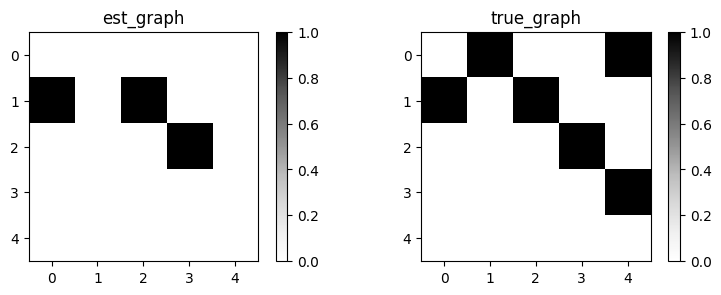

{'fdr': 0.0, 'tpr': 0.8333, 'fpr': 0.0, 'shd': 2, 'nnz': 3, 'precision': 1.0, 'recall': 0.5, 'F1': 0.6667, 'gscore': 0.5}


In [20]:
# ICALiNGAM learn
#g = DirectLiNGAM()
g = ICALiNGAM()
g.learn(data_full)

# plot est_dag and true_dag
GraphDAG(g.causal_matrix, matrix.A)

# calculate accuracy
met = MetricsDAG(g.causal_matrix, matrix.A)
print(met.metrics)

# ICALiNGAM alg gcastle lib, half data

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


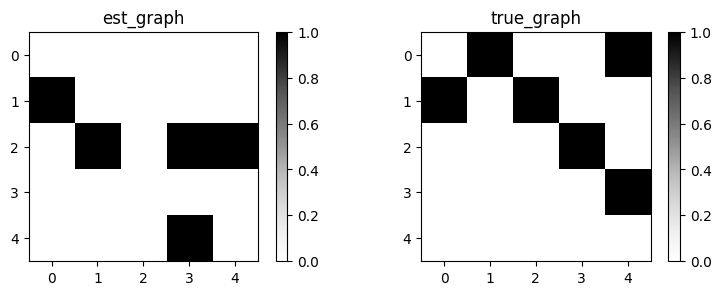

{'fdr': 0.6, 'tpr': 0.6667, 'fpr': 0.75, 'shd': 4, 'nnz': 5, 'precision': 0.4, 'recall': 0.3333, 'F1': 0.3636, 'gscore': 0.0}


In [21]:
# ICALiNGAM learn
#g = DirectLiNGAM()
g = ICALiNGAM()
g.learn(data_half)

# plot est_dag and true_dag
GraphDAG(g.causal_matrix, matrix.A)

# calculate accuracy
met = MetricsDAG(g.causal_matrix, matrix.A)
print(met.metrics)

# Granger alg causal-learn lib, full data

In [22]:
#https://causal-learn.readthedocs.io/en/latest/search_methods_index/Granger%20causality/LinearGranger.html
from scipy import *
from causallearn.search.Granger.Granger import Granger

data_path = "/content/BOLDfslfilter_28.txt"
data_full = np.loadtxt(data_path, skiprows=1)

G = Granger()
coeff = G.granger_lasso(data_full)

coeff

array([[ 0.727,  0.41 ,  0.097,  0.075,  0.077, -0.129, -0.12 , -0.122,
        -0.075, -0.075],
       [ 0.233,  0.7  ,  0.102,  0.052,  0.052, -0.193, -0.125, -0.088,
        -0.048, -0.092],
       [ 0.092,  0.199,  0.713,  0.18 ,  0.012, -0.061, -0.084, -0.069,
        -0.151, -0.006],
       [ 0.027,  0.032,  0.074,  0.748,  0.108, -0.027, -0.   , -0.057,
        -0.137, -0.159],
       [ 0.136,  0.07 ,  0.04 ,  0.122,  0.507, -0.141,  0.046, -0.045,
        -0.02 ,  0.151]])